In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


/var/folders/mb/k7ytllq12898_g9h09d9x9r80000gp/T/ipykernel_13503/4130893167.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the single marital status dataset
df = pd.read_csv("train_single.csv")

# Define feature types
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_features = ['default', 'housing', 'loan', 'y']

# pre-processing categorical_features
label_encoder = LabelEncoder()
for column in categorical_features:
    if column in df.columns: 
        df[column] = label_encoder.fit_transform(df[column])

for column in binary_features:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

# Function Definitions
def preprocess_data(df):
    X = df.drop(columns=['y'])
    y = df['y']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)
    return X_train, X_valid, y_train, y_valid

def evaluate_model(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

def fit_nb(X_train, y_train, X_valid, y_valid):
    # Define the parameter grid
    parameters = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Using 'var_smoothing' instead of 'alpha'
    }
    
    # Create the model
    model = GaussianNB()
    
    # Perform grid search
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print the results of each hyperparameter combination
    cv_results = grid_search.cv_results_
    for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
        print(f"Mean Test Score: {mean_score}, Parameters: {params}")
    
    # Plot the mean test score for each hyperparameter combination
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    scores = cv_results['mean_test_score']
    var_smoothing = [param['var_smoothing'] for param in cv_results['params']]
    plt.plot(var_smoothing, scores, marker='o')
    plt.xlabel('Var Smoothing')
    plt.ylabel('Mean Test Score')
    plt.title('Mean Test Score vs Var Smoothing (NB)')
    plt.grid(True)
    
    # Plot 5-fold cross-validation accuracy
    plt.subplot(1, 2, 2)
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    plt.plot(np.arange(1, 6), cv_accuracy, marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('5-Fold Cross-Validation Accuracy (NB)')
    plt.xticks(np.arange(1, 6))
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Evaluate the best model on the validation set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))
    
    return best_model, grid_search.best_score_


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

def fit_random_forest(X_train, y_train, X_valid, y_valid):
    parameters = {'n_estimators': [10, 50, 100, 150, 200]}
    
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print the results of each hyperparameter combination
    cv_results = grid_search.cv_results_
    for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
        print(f"Mean Test Score: {mean_score}, Parameters: {params}")
    
    # Plot the mean test score for each hyperparameter combination
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    scores = cv_results['mean_test_score']
    n_estimators = [param['n_estimators'] for param in cv_results['params']]
    plt.plot(n_estimators, scores, marker='o')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Test Score')
    plt.title('Mean Test Score vs Number of Estimators (Random Forest)')
    plt.grid(True)
    
    # Plot 5-fold cross-validation accuracy
    plt.subplot(1, 2, 2)
    model = RandomForestClassifier(random_state=42, **grid_search.best_params_)
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    plt.plot(np.arange(1, 6), cv_accuracy, marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('5-Fold Cross-Validation Accuracy (Random Forest)')
    plt.xticks(np.arange(1, 6))
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print the mean accuracy over 5 folds
    print("Mean accuracy over 5 folds:", grid_search.best_score_)
    
    # Evaluate the best model on the validation set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))
    
    return best_model, grid_search.best_score_


Mean Test Score: 0.8321263113151091, Parameters: {'var_smoothing': 1e-09}
Mean Test Score: 0.8375320429762727, Parameters: {'var_smoothing': 1e-08}
Mean Test Score: 0.8479575923443619, Parameters: {'var_smoothing': 1e-07}
Mean Test Score: 0.8586727636099921, Parameters: {'var_smoothing': 1e-06}
Mean Test Score: 0.8600243946091363, Parameters: {'var_smoothing': 1e-05}


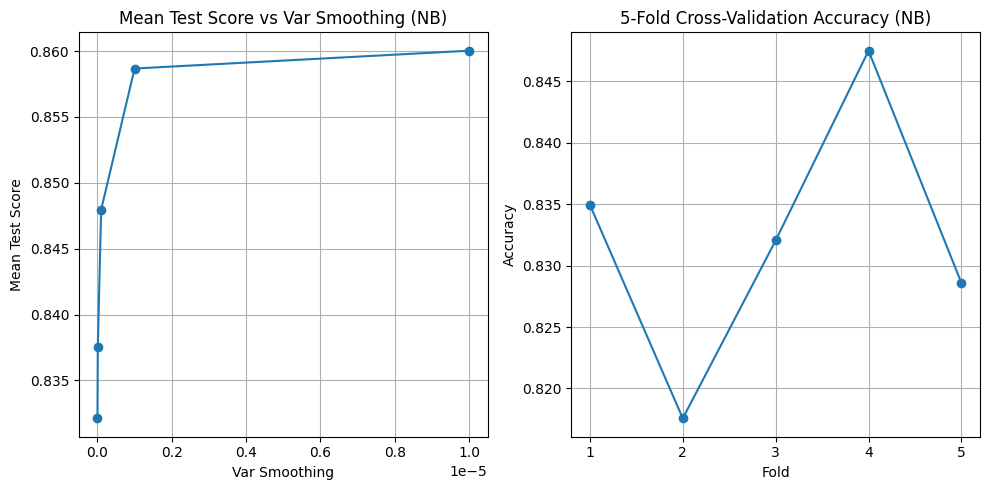

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       976
           1       0.52      0.24      0.33       176

    accuracy                           0.85      1152
   macro avg       0.70      0.60      0.62      1152
weighted avg       0.82      0.85      0.83      1152

Best Score: 0.8600243946091363


In [5]:
# Preprocess data
X_train, X_valid, y_train, y_valid = preprocess_data(df)

# Perform grid search, print the results, and plot the graphs
best_model, best_score = fit_nb(X_train, y_train, X_valid, y_valid)
print("Best Score:", best_score)

Mean Test Score: 0.8743119266055046, Parameters: {'n_estimators': 10}
Mean Test Score: 0.8817451513733504, Parameters: {'n_estimators': 50}
Mean Test Score: 0.8829034525316516, Parameters: {'n_estimators': 100}
Mean Test Score: 0.8820346334469946, Parameters: {'n_estimators': 150}
Mean Test Score: 0.8829032660997896, Parameters: {'n_estimators': 200}


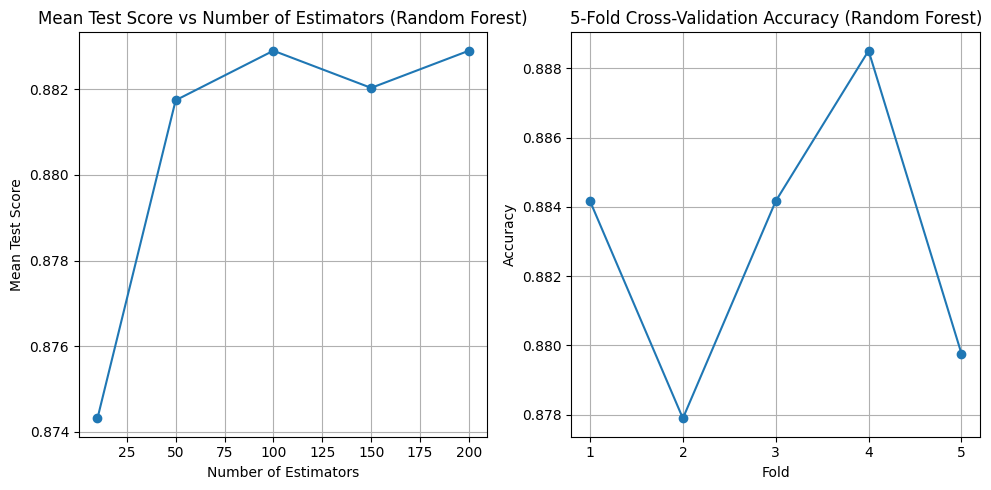

Mean accuracy over 5 folds: 0.8829034525316516
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       976
           1       0.58      0.38      0.46       176

    accuracy                           0.86      1152
   macro avg       0.74      0.67      0.69      1152
weighted avg       0.85      0.86      0.85      1152

Best Score: 0.8829034525316516


In [6]:
# Preprocess data
X_train, X_valid, y_train, y_valid = preprocess_data(df)

# Perform grid search, print the results, and plot the graphs
best_model, best_score = fit_random_forest(X_train, y_train, X_valid, y_valid)
print("Best Score:", best_score)